In [1]:
!pip install h5py

# **Getting the files and filepaths**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Hyperparameters

In [2]:
cd /content/drive/My\ Drive/Research/COVID/data

/content/drive/My Drive/Research/COVID/data


In [0]:
EPOCHS = 100
IMSIZE = 224
LR = 1e-3
TRAINBS = 12
TESTBS = 10
BS = 70
EXACC = 0.95
VALACC = 0.95
EXLOSS = 0.001

In [0]:
d1_base_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsARDS/"
d2_base_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsNORMAL/"
d3_base_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsVBPNEUMONIA/"

d1_train_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsARDS/train/"
d2_train_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsNORMAL/train/"
d3_train_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsVBPNEUMONIA/train/"

d1_test_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsARDS/test/"
d2_test_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsNORMAL/test/"
d3_test_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsVBPNEUMONIA/test/"

d1_validation_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsARDS/validation/"
d2_validation_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsNORMAL/validation/"
d3_validation_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsVBPNEUMONIA/validation/"

d1_main_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsARDS/main/"
d2_main_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsNORMAL/main/"
d3_main_dir = "/content/drive/My Drive/Research/COVID/data/COVIDvsVBPNEUMONIA/main/"

In [5]:
import imutils
import math
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.models import load_model
import copy

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
tf.__version__

'2.2.0-rc2'

# Generators

In [0]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                                rotation_range=20,
                                                                fill_mode="nearest")

"""validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)"""

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [8]:
#getting the generators

d1_train_generator = train_datagen.flow_from_directory(d1_train_dir, 
                                                       target_size=(IMSIZE,IMSIZE), 
                                                       class_mode='binary', 
                                                       batch_size=TRAINBS, 
                                                       shuffle=True)

"""d1_validation_generator = validation_datagen.flow_from_directory(d1_validation_dir, 
                                                                 target_size=(256,256), 
                                                                 class_mode='binary', 
                                                                 batch_size=8, 
                                                                 shuffle=False)"""

d1_test_generator = test_datagen.flow_from_directory(d1_test_dir, 
                                                     target_size=(IMSIZE,IMSIZE),
                                                     class_mode="binary", 
                                                     batch_size=TESTBS, 
                                                     shuffle=False)

d1_stepsize_train = d1_train_generator.n//d1_train_generator.batch_size
"""d1_stepsize_validation = d1_validation_generator.n//d1_validation_generator.batch_size"""
d1_stepsize_test = d1_test_generator.n//d1_test_generator.batch_size

print(d1_stepsize_train)
print(d1_stepsize_test)
"""print(d1_stepsize_validation)"""

Found 86 images belonging to 2 classes.
Found 70 images belonging to 2 classes.
7
7


'print(d1_stepsize_validation)'

In [9]:
#getting the generators

d2_train_generator = train_datagen.flow_from_directory(d2_train_dir, 
                                                       target_size=(IMSIZE,IMSIZE),
                                                       class_mode='binary', 
                                                       batch_size=TRAINBS, 
                                                       shuffle=True)

"""d2_validation_generator = validation_datagen.flow_from_directory(d2_validation_dir, 
                                                                 target_size=(256,256), 
                                                                 class_mode='binary', 
                                                                 batch_size=8, 
                                                                 shuffle=False)"""

d2_test_generator = test_datagen.flow_from_directory(d2_test_dir, 
                                                     target_size=(IMSIZE,IMSIZE),
                                                     class_mode='binary', 
                                                     batch_size=TESTBS, 
                                                     shuffle=False)

d2_stepsize_train = d2_train_generator.n//d2_train_generator.batch_size
"""d2_stepsize_validation = d2_validation_generator.n//d2_validation_generator.batch_size"""
d2_stepsize_test = d2_test_generator.n//d2_test_generator.batch_size

print(d2_stepsize_train)
print(d2_stepsize_test)
"""print(d2_stepsize_validation)"""

Found 86 images belonging to 2 classes.
Found 70 images belonging to 2 classes.
7
7


'print(d2_stepsize_validation)'

In [10]:
#getting the generators

d3_train_generator = train_datagen.flow_from_directory(d3_train_dir, 
                                                       target_size=(IMSIZE,IMSIZE), 
                                                       class_mode='binary', 
                                                       batch_size=TRAINBS, 
                                                       shuffle=True)

"""d3_validation_generator = validation_datagen.flow_from_directory(d3_validation_dir, 
                                                                 target_size=(256,256), 
                                                                 class_mode='binary', 
                                                                 batch_size=8, 
                                                                 shuffle=False)"""

d3_test_generator = test_datagen.flow_from_directory(d3_test_dir, 
                                                     target_size=(IMSIZE,IMSIZE), 
                                                     batch_size=TESTBS, 
                                                     class_mode='binary',
                                                     shuffle=False)

d3_stepsize_train = d3_train_generator.n//d3_train_generator.batch_size
"""d3_stepsize_validation = d3_validation_generator.n//d3_validation_generator.batch_size"""
d3_stepsize_test = d3_test_generator.n//d3_test_generator.batch_size

print(d3_stepsize_train)
"""print(d3_stepsize_validation)"""
print(d3_stepsize_test)

Found 86 images belonging to 2 classes.
Found 70 images belonging to 2 classes.
7
7


In [11]:
d3_train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [0]:
#validation_generator.classes

In [0]:
#ls -a /content/drive/My\ Drive/Research/COVID/data/COVIDvsNORMAL/train/

In [0]:
#rmdir /content/drive/My\ Drive/Research/COVID/data/COVIDvsVBPNEUMONIA/test/.ipynb_checkpoints/

# Callbacks and checkpoints

In [0]:
class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') <= EXLOSS and logs.get('accuracy') >= EXACC and logs.get('val_accuracy') >= VALACC):
      print("\nCALLBAKC: TRAINING LOSS {} reached.".format(EXLOSS))
      self.model.stop_training  = True

ccall = myCallBack()



In [0]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', mode='min', min_delta=0.01, baseline = 0.01, patience=50, verbose = 1)

# calculateMetrics()

In [0]:
def calculateMetrics(model, generator, stepsize, history, modelname_dataset_string, ind):

  historycopy = copy.copy(history)

  generator.reset()
  y_pred = model.predict(generator, steps=stepsize)

  print(generator.class_indices, end = "\n\n")

  pred_proc = []
  for pred in y_pred:
    pred_proc.append(round(pred[0]))

  print(classification_report(generator.classes, pred_proc))

  cm = confusion_matrix(generator.classes, pred_proc)
  print(cm, end="\n\n")

  model.evaluate(generator, steps=stepsize)

  acc = historycopy.history['accuracy']
  loss = historycopy.history['loss']

  val_acc = historycopy.history['val_accuracy']
  val_loss = historycopy.history['val_loss']

  epochs = len(acc)

  
  for i in range(epochs):
    acc[i] = acc[i] * 100
    val_acc[i] = val_acc[i] * 100
  

  #print(acc)


  plt.figure(1)

  plt.plot(range(1, epochs), acc[1:], label='Train ACC')
  plt.plot(range(1, epochs), val_acc[1:], label='Validation ACC')
  plt.xlabel("Iterations")
  plt.ylabel("Percentage")
  plt.ylim(0, 102)
  plt.legend()
  plt.savefig(modelname_dataset_string+"_accuracy.png")
  plt.show()
  

  plt.figure(2)

  plt.plot(range(1, epochs), loss[1:], label='Train Loss')
  plt.plot(range(1, epochs), val_loss[1:], label='Validation Loss')
  plt.xlabel("Iterations")
  plt.ylabel("Amount")
  plt.ylim(-.05, 1)
  plt.legend()
  plt.savefig(modelname_dataset_string+"_loss.png")
  
  plt.show()
  
  df = pd.DataFrame(cm, index=ind, columns = ind)
  plt.figure(3)
  hm = sns.heatmap(df, annot=True)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  fig = hm.get_figure()
  fig.savefig(modelname_dataset_string+"_cm.png")

# **VGG16**

In [0]:
def get_VGG16_model(): 
  base_model = tf.keras.applications.VGG16(include_top = False, weights='imagenet', input_shape=(IMSIZE,IMSIZE,3))
  #base_model.summary()

  x = base_model.output
  x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2,2)(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(32, activation="relu")(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

  for layer in base_model.layers:
    layer.trainable = False

  vgg16_model = tf.keras.Model(base_model.input, x)
  vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])

  #vgg16_model.summary()

  return vgg16_model

In [19]:
d1_vgg16_model = get_VGG16_model()

d1_vgg16_mc = tf.keras.callbacks.ModelCheckpoint("d1_vgg16_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d1_vgg16_history = d1_vgg16_model.fit(d1_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d1_test_generator, 
                          steps_per_epoch=d1_stepsize_train, 
                          validation_steps=d1_stepsize_test,
                          callbacks=[ccall, es, d1_vgg16_mc]
                          )

58892288/58889256 [==============================] - 0s 0us/step
Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.7610 - accuracy: 0.5119
Epoch 00001: val_loss improved from inf to 0.68116, saving model to d1_vgg16_best_model.h5
7/7 [==============================] - 38s 5s/step - loss: 0.7610 - accuracy: 0.5119 - val_loss: 0.6812 - val_accuracy: 0.6714
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.6632 - accuracy: 0.5811
Epoch 00002: val_loss did not improve from 0.68116
7/7 [==============================] - 7s 1s/step - loss: 0.6632 - accuracy: 0.5811 - val_loss: 0.6939 - val_accuracy: 0.4857
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.6834 - accuracy: 0.5405
Epoch 00003: val_loss improved from 0.68116 to 0.66992, saving model to d1_vgg16_best_model.h5
7/7 [==============================] - 8s 1s/step - loss: 0.6834 - accuracy: 0.5405 - val_loss: 0.6699 - val_accuracy: 0.5143
Epoch 4/100
7/7 [=======================

{'ARDS': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       0.64      0.66      0.65        35
           1       0.65      0.63      0.64        35

    accuracy                           0.64        70
   macro avg       0.64      0.64      0.64        70
weighted avg       0.64      0.64      0.64        70

[[23 12]
 [13 22]]

7/7 [==============================] - 3s 401ms/step - loss: 0.6301 - accuracy: 0.6429


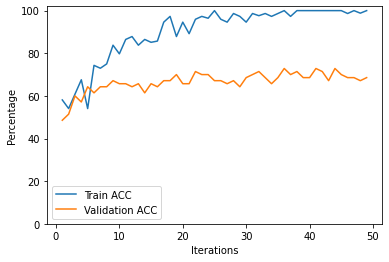

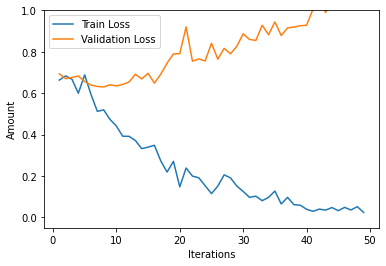

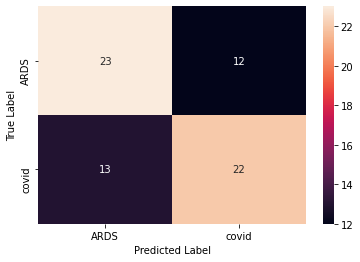

In [20]:
d1_vgg16_best_model = load_model("d1_vgg16_best_model.h5")

calculateMetrics(d1_vgg16_best_model, d1_test_generator, d1_stepsize_test, d1_vgg16_history, "d1_vgg16", ['ARDS', 'covid'])

In [21]:
d2_vgg16_model = get_VGG16_model()

d2_vgg16_mc = tf.keras.callbacks.ModelCheckpoint("d2_vgg16_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d2_vgg16_history = d2_vgg16_model.fit(d2_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d2_test_generator, 
                          steps_per_epoch=d2_stepsize_train, 
                          validation_steps=d2_stepsize_test,
                          callbacks=[ccall, es, d2_vgg16_mc]
                          )

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.6031 - accuracy: 0.7024
Epoch 00001: val_loss improved from inf to 0.45281, saving model to d2_vgg16_best_model.h5
7/7 [==============================] - 32s 5s/step - loss: 0.6031 - accuracy: 0.7024 - val_loss: 0.4528 - val_accuracy: 0.9857
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.4313 - accuracy: 0.8514
Epoch 00002: val_loss improved from 0.45281 to 0.24963, saving model to d2_vgg16_best_model.h5
7/7 [==============================] - 6s 865ms/step - loss: 0.4313 - accuracy: 0.8514 - val_loss: 0.2496 - val_accuracy: 1.0000
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.2699 - accuracy: 0.9189
Epoch 00003: val_loss improved from 0.24963 to 0.13364, saving model to d2_vgg16_best_model.h5
7/7 [==============================] - 5s 746ms/step - loss: 0.2699 - accuracy: 0.9189 - val_loss: 0.1336 - val_accuracy: 1.0000
Epoch 4/100
7/7 [==============================] - ETA:

{'NORMAL': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

[[35  0]
 [ 0 35]]

7/7 [==============================] - 2s 254ms/step - loss: 0.0011 - accuracy: 1.0000


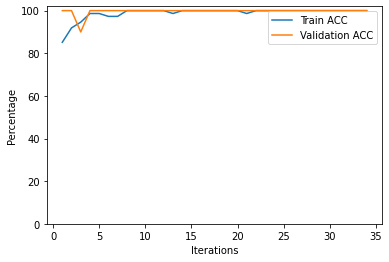

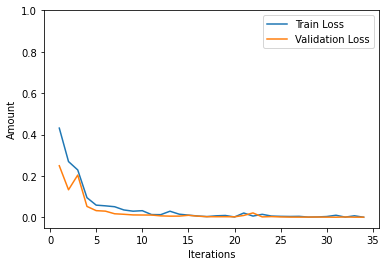

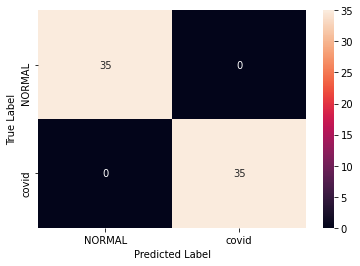

In [22]:
d2_vgg16_best_model = load_model("d2_vgg16_best_model.h5")

calculateMetrics(d2_vgg16_best_model, d2_test_generator, d2_stepsize_test, d2_vgg16_history, "d2_vgg16", ['NORMAL', 'covid'])

In [23]:
d3_vgg16_model = get_VGG16_model()

d3_vgg16_mc = tf.keras.callbacks.ModelCheckpoint("d3_vgg16_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d3_vgg16_history = d3_vgg16_model.fit(d3_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d3_test_generator, 
                          steps_per_epoch=d3_stepsize_train, 
                          validation_steps=d3_stepsize_test,
                          callbacks=[es, ccall, d3_vgg16_mc]
                          )

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.6767 - accuracy: 0.6310
Epoch 00001: val_loss improved from inf to 0.57651, saving model to d3_vgg16_best_model.h5
7/7 [==============================] - 32s 5s/step - loss: 0.6767 - accuracy: 0.6310 - val_loss: 0.5765 - val_accuracy: 0.9143
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.5868 - accuracy: 0.6081
Epoch 00002: val_loss improved from 0.57651 to 0.46593, saving model to d3_vgg16_best_model.h5
7/7 [==============================] - 5s 677ms/step - loss: 0.5868 - accuracy: 0.6081 - val_loss: 0.4659 - val_accuracy: 0.9429
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.4921 - accuracy: 0.7973
Epoch 00003: val_loss improved from 0.46593 to 0.39438, saving model to d3_vgg16_best_model.h5
7/7 [==============================] - 4s 567ms/step - loss: 0.4921 - accuracy: 0.7973 - val_loss: 0.3944 - val_accuracy: 0.9429
Epoch 4/100
7/7 [==============================] - ETA:

{'VBP': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

[[35  0]
 [ 0 35]]

7/7 [==============================] - 1s 194ms/step - loss: 0.0292 - accuracy: 1.0000


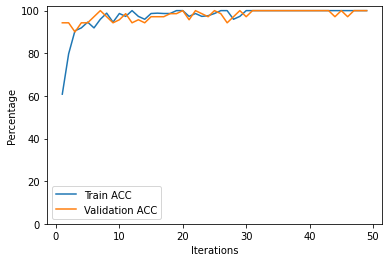

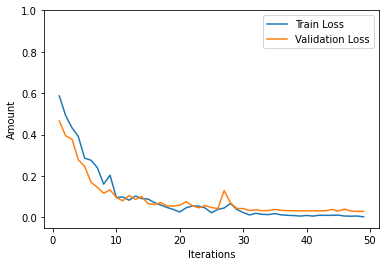

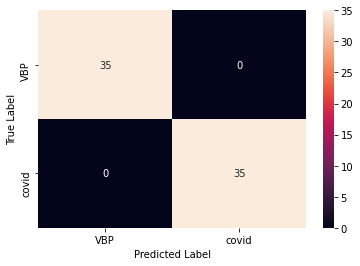

In [24]:
d3_vgg16_best_model = load_model("d3_vgg16_best_model.h5")

calculateMetrics(d3_vgg16_best_model, d3_test_generator, d3_stepsize_test, d3_vgg16_history, "d3_vgg16", ['VBP', 'covid'])

# **VGG19**

In [0]:
def get_vgg19_model():

  vgg19_basemodel = tf.keras.applications.VGG19(include_top = False, weights='imagenet', input_shape=(IMSIZE,IMSIZE,3))
  #vgg19_basemodel.summary()

  x = vgg19_basemodel.output

  x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2,2)(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(32, activation="relu")(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

  for layer in vgg19_basemodel.layers:
    layer.trainable = False

  vgg19_model = tf.keras.Model(vgg19_basemodel.input, x)
  vgg19_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])

  #vgg19_model.summary()

  return vgg19_model

In [26]:
d1_vgg19_model = get_vgg19_model()

d1_vgg19_mc = tf.keras.callbacks.ModelCheckpoint("d1_vgg19_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d1_vgg19_history = d1_vgg19_model.fit(d1_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d1_test_generator, 
                          steps_per_epoch=d1_stepsize_train, 
                          validation_steps=d1_stepsize_test,
                          callbacks=[ccall, es, d1_vgg19_mc]
                          )

80142336/80134624 [==============================] - 1s 0us/step
Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.7523 - accuracy: 0.4189
Epoch 00001: val_loss improved from inf to 0.70509, saving model to d1_vgg19_best_model.h5
7/7 [==============================] - 9s 1s/step - loss: 0.7523 - accuracy: 0.4189 - val_loss: 0.7051 - val_accuracy: 0.5143
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.6667 - accuracy: 0.5811
Epoch 00002: val_loss improved from 0.70509 to 0.66444, saving model to d1_vgg19_best_model.h5
7/7 [==============================] - 8s 1s/step - loss: 0.6667 - accuracy: 0.5811 - val_loss: 0.6644 - val_accuracy: 0.6571
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.6141 - accuracy: 0.6486
Epoch 00003: val_loss did not improve from 0.66444
7/7 [==============================] - 7s 1s/step - loss: 0.6141 - accuracy: 0.6486 - val_loss: 0.7000 - val_accuracy: 0.5000
Epoch 4/100
7/7 [========================

{'ARDS': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       0.59      0.69      0.63        35
           1       0.62      0.51      0.56        35

    accuracy                           0.60        70
   macro avg       0.60      0.60      0.60        70
weighted avg       0.60      0.60      0.60        70

[[24 11]
 [17 18]]

7/7 [==============================] - 3s 408ms/step - loss: 0.6302 - accuracy: 0.6000


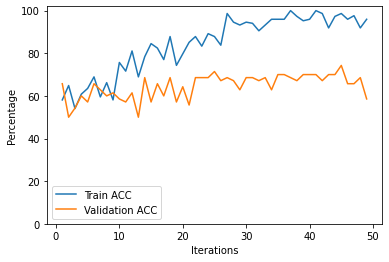

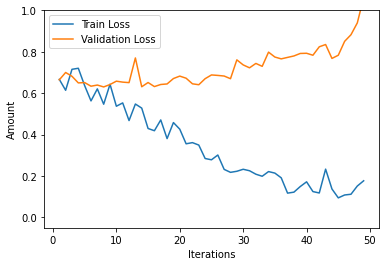

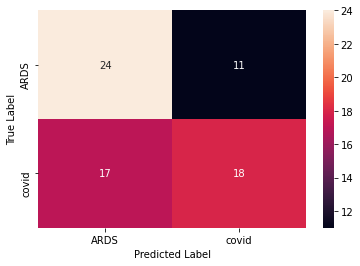

In [27]:
d1_vgg19_best_model = load_model("d1_vgg19_best_model.h5")

calculateMetrics(d1_vgg19_best_model, d1_test_generator, d1_stepsize_test, d1_vgg19_history, "d1_vgg19", ['ARDS', 'covid'])

In [28]:
d2_vgg19_model = get_vgg19_model()

d2_vgg19_mc = tf.keras.callbacks.ModelCheckpoint("d2_vgg19_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d2_vgg19_history = d2_vgg19_model.fit(d2_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d2_test_generator, 
                          steps_per_epoch=d2_stepsize_train, 
                          validation_steps=d2_stepsize_test,
                          callbacks=[ccall, es, d2_vgg19_mc]
                          )

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.7788 - accuracy: 0.4865
Epoch 00001: val_loss improved from inf to 0.61807, saving model to d2_vgg19_best_model.h5
7/7 [==============================] - 6s 927ms/step - loss: 0.7788 - accuracy: 0.4865 - val_loss: 0.6181 - val_accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.5608 - accuracy: 0.6351
Epoch 00002: val_loss improved from 0.61807 to 0.42024, saving model to d2_vgg19_best_model.h5
7/7 [==============================] - 5s 741ms/step - loss: 0.5608 - accuracy: 0.6351 - val_loss: 0.4202 - val_accuracy: 0.9143
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.4444 - accuracy: 0.8243
Epoch 00003: val_loss improved from 0.42024 to 0.28333, saving model to d2_vgg19_best_model.h5
7/7 [==============================] - 6s 844ms/step - loss: 0.4444 - accuracy: 0.8243 - val_loss: 0.2833 - val_accuracy: 0.9286
Epoch 4/100
7/7 [==============================] - ET

{'NORMAL': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

[[35  0]
 [ 0 35]]

7/7 [==============================] - 2s 253ms/step - loss: 0.0101 - accuracy: 1.0000


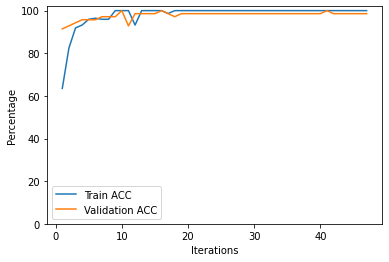

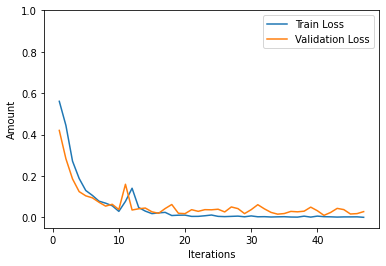

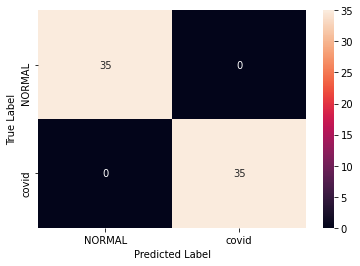

In [29]:
d2_vgg19_best_model = load_model("d2_vgg19_best_model.h5")

calculateMetrics(d2_vgg19_best_model, d2_test_generator, d2_stepsize_test, d2_vgg19_history, "d2_vgg19", ['NORMAL', 'covid'])

In [30]:
d3_vgg19_model = get_vgg19_model()

d3_vgg19_mc = tf.keras.callbacks.ModelCheckpoint("d3_vgg19_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d3_vgg19_history = d3_vgg19_model.fit(d3_train_generator, 
                          epochs=EPOCHS,
                          validation_data=d3_test_generator, 
                          steps_per_epoch=d3_stepsize_train, 
                          validation_steps=d3_stepsize_test,
                          callbacks=[ccall, es, d3_vgg19_mc]
                          )

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.7688 - accuracy: 0.5405
Epoch 00001: val_loss improved from inf to 0.60406, saving model to d3_vgg19_best_model.h5
7/7 [==============================] - 6s 894ms/step - loss: 0.7688 - accuracy: 0.5405 - val_loss: 0.6041 - val_accuracy: 0.7429
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.6453 - accuracy: 0.6757
Epoch 00002: val_loss improved from 0.60406 to 0.50807, saving model to d3_vgg19_best_model.h5
7/7 [==============================] - 4s 630ms/step - loss: 0.6453 - accuracy: 0.6757 - val_loss: 0.5081 - val_accuracy: 0.8286
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.5099 - accuracy: 0.8108
Epoch 00003: val_loss improved from 0.50807 to 0.43347, saving model to d3_vgg19_best_model.h5
7/7 [==============================] - 5s 729ms/step - loss: 0.5099 - accuracy: 0.8108 - val_loss: 0.4335 - val_accuracy: 0.9714
Epoch 4/100
7/7 [==============================] - ET

{'VBP': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

[[35  0]
 [ 0 35]]

7/7 [==============================] - 1s 211ms/step - loss: 0.0164 - accuracy: 1.0000


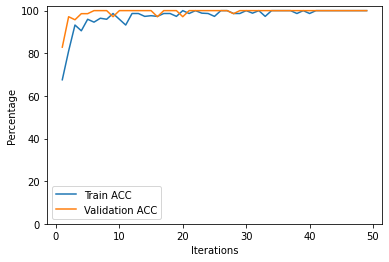

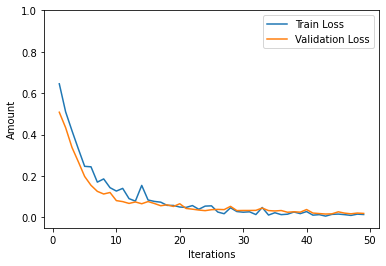

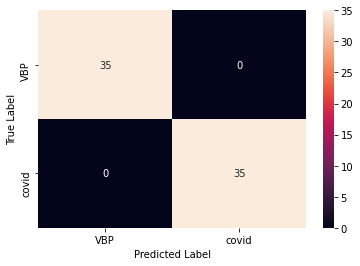

In [31]:
d3_vgg19_best_model = load_model("d3_vgg19_best_model.h5")

calculateMetrics(d3_vgg19_best_model, d3_test_generator, d3_stepsize_test, d3_vgg19_history, "d3_vgg19", ['VBP', 'covid'])

# **InceptionV3**

In [0]:
def get_inceptionv3_model():
  
  inceptionv3_basemodel = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=(IMSIZE,IMSIZE,3))
  #inceptionv3_basemodel.summary()

  x = inceptionv3_basemodel.output

  x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2,2)(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(32, activation="relu")(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

  for layer in inceptionv3_basemodel.layers:
    layer.trainable = False

  inceptionv3_model = tf.keras.Model(inceptionv3_basemodel.input, x)
  inceptionv3_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])

  #inceptionv3_model.summary()

  return inceptionv3_model

In [33]:
d1_inceptionv3_model = get_inceptionv3_model()

d1_inceptionv3_mc = tf.keras.callbacks.ModelCheckpoint("d1_inceptionv3_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d1_inceptionv3_history = d1_inceptionv3_model.fit(d1_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d1_test_generator, 
                          steps_per_epoch=d1_stepsize_train, 
                          validation_steps=d1_stepsize_test,
                          callbacks=[ccall, es, d1_inceptionv3_mc]
                          )

87916544/87910968 [==============================] - 1s 0us/step
Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 2.1435 - accuracy: 0.3378
Epoch 00001: val_loss improved from inf to 1.26881, saving model to d1_inceptionv3_best_model.h5
7/7 [==============================] - 11s 2s/step - loss: 2.1435 - accuracy: 0.3378 - val_loss: 1.2688 - val_accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 1.6080 - accuracy: 0.5541
Epoch 00002: val_loss improved from 1.26881 to 1.07141, saving model to d1_inceptionv3_best_model.h5
7/7 [==============================] - 8s 1s/step - loss: 1.6080 - accuracy: 0.5541 - val_loss: 1.0714 - val_accuracy: 0.5000
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 1.6177 - accuracy: 0.5270
Epoch 00003: val_loss improved from 1.07141 to 0.68093, saving model to d1_inceptionv3_best_model.h5
7/7 [==============================] - 7s 1s/step - loss: 1.6177 - accuracy: 0.5270 - val_loss: 0.6809 -

{'ARDS': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       0.78      0.40      0.53        35
           1       0.60      0.89      0.71        35

    accuracy                           0.64        70
   macro avg       0.69      0.64      0.62        70
weighted avg       0.69      0.64      0.62        70

[[14 21]
 [ 4 31]]

7/7 [==============================] - 3s 400ms/step - loss: 0.5944 - accuracy: 0.6429


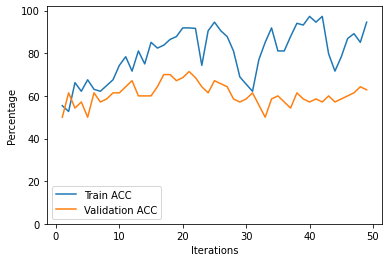

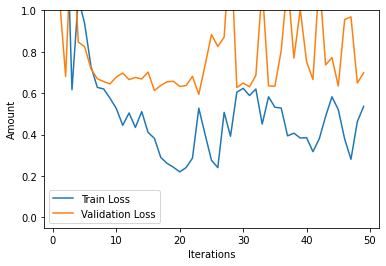

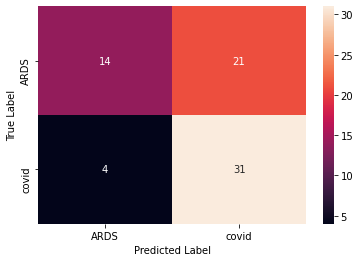

In [34]:
d1_inceptionv3_best_model = load_model("d1_inceptionv3_best_model.h5")

calculateMetrics(d1_inceptionv3_best_model, d1_test_generator, d1_stepsize_test, d1_inceptionv3_history, "d1_inceptionv3", ['ARDS', 'covid'])

In [35]:
d2_inceptionv3_model = get_inceptionv3_model()

d2_inceptionv3_mc = tf.keras.callbacks.ModelCheckpoint("d2_inceptionv3_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d2_inceptionv3_history = d2_inceptionv3_model.fit(d2_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d2_test_generator, 
                          steps_per_epoch=d2_stepsize_train, 
                          validation_steps=d2_stepsize_test,
                          callbacks=[ccall, es, d2_inceptionv3_mc]
                          )

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 1.0936 - accuracy: 0.7027
Epoch 00001: val_loss improved from inf to 0.14475, saving model to d2_inceptionv3_best_model.h5
7/7 [==============================] - 9s 1s/step - loss: 1.0936 - accuracy: 0.7027 - val_loss: 0.1447 - val_accuracy: 0.9714
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.6927 - accuracy: 0.7162
Epoch 00002: val_loss did not improve from 0.14475
7/7 [==============================] - 5s 728ms/step - loss: 0.6927 - accuracy: 0.7162 - val_loss: 0.3457 - val_accuracy: 0.9000
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.5894 - accuracy: 0.8649
Epoch 00003: val_loss did not improve from 0.14475
7/7 [==============================] - 5s 707ms/step - loss: 0.5894 - accuracy: 0.8649 - val_loss: 0.3754 - val_accuracy: 0.9143
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 0.2536 - accuracy: 0.9324
Epoch 00004: val_loss improved from 0.14475 t

{'NORMAL': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

[[35  0]
 [ 0 35]]

7/7 [==============================] - 2s 249ms/step - loss: 5.2066e-04 - accuracy: 1.0000


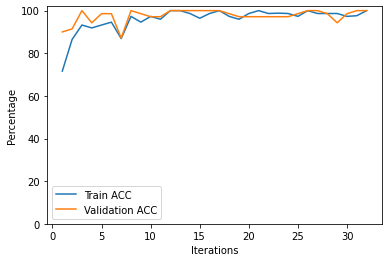

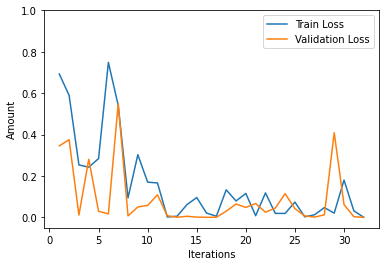

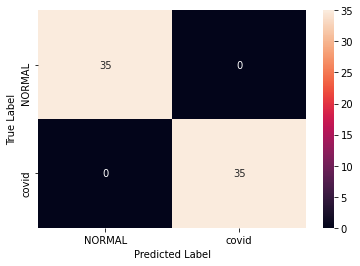

In [36]:
d2_inceptionv3_best_model = load_model("d2_inceptionv3_best_model.h5")

calculateMetrics(d2_inceptionv3_best_model, d2_test_generator, d2_stepsize_test, d2_inceptionv3_history, "d2_inceptionv3", ['NORMAL', 'covid'])

In [37]:
d3_inceptionv3_model = get_inceptionv3_model()

d3_inceptionv3_mc = tf.keras.callbacks.ModelCheckpoint("d3_inceptionv3_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d3_inceptionv3_history = d3_inceptionv3_model.fit(d3_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d3_test_generator, 
                          steps_per_epoch=d3_stepsize_train, 
                          validation_steps=d3_stepsize_test,
                          callbacks=[ccall, es, d3_inceptionv3_mc]
                          )

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 1.6361 - accuracy: 0.5405
Epoch 00001: val_loss improved from inf to 0.85558, saving model to d3_inceptionv3_best_model.h5
7/7 [==============================] - 8s 1s/step - loss: 1.6361 - accuracy: 0.5405 - val_loss: 0.8556 - val_accuracy: 0.6571
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.8123 - accuracy: 0.7297
Epoch 00002: val_loss improved from 0.85558 to 0.19462, saving model to d3_inceptionv3_best_model.h5
7/7 [==============================] - 5s 732ms/step - loss: 0.8123 - accuracy: 0.7297 - val_loss: 0.1946 - val_accuracy: 0.9429
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.9970 - accuracy: 0.8649
Epoch 00003: val_loss did not improve from 0.19462
7/7 [==============================] - 4s 565ms/step - loss: 0.9970 - accuracy: 0.8649 - val_loss: 0.1992 - val_accuracy: 0.9286
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 0.2646 - accuracy: 0.

{'VBP': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        35
           1       0.97      0.94      0.96        35

    accuracy                           0.96        70
   macro avg       0.96      0.96      0.96        70
weighted avg       0.96      0.96      0.96        70

[[34  1]
 [ 2 33]]

7/7 [==============================] - 1s 190ms/step - loss: 0.1150 - accuracy: 0.9571


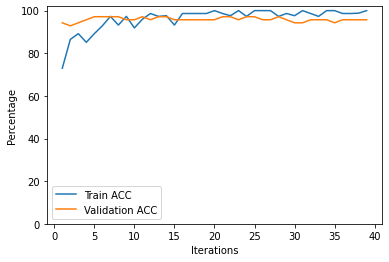

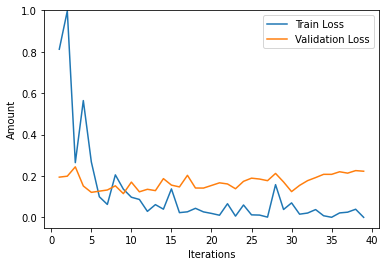

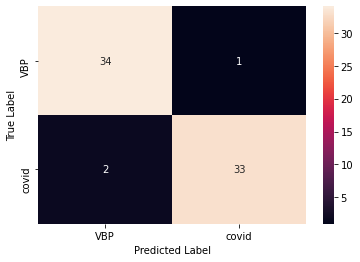

In [38]:
d3_inceptionv3_best_model = load_model("d3_inceptionv3_best_model.h5")

calculateMetrics(d3_inceptionv3_best_model, d3_test_generator, d3_stepsize_test, d3_inceptionv3_history, "d3_inceptionv3", ['VBP', 'covid'])

# **Xception**

In [0]:
def get_xception_model():

  xception_basemodel = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(IMSIZE,IMSIZE,3))
  #xception_basemodel.summary()

  x = xception_basemodel.output

  """x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPool2D(2,2) (x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(16, activation='relu')"""

  #x = tf.keras.layers.GlobalAveragePooling2D()(x)
  """x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2,2)(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.3) (x)
  x = tf.keras.layers.Dense(2, activation='softmax') (x)"""

  x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2,2)(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(32, activation="relu")(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

  for layer in xception_basemodel.layers:
    layer.trainable = False

  xception_model = tf.keras.Model(xception_basemodel.input, x)
  xception_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])

  #xception_model.summary()

  return xception_model


In [40]:
d1_xception_model = get_xception_model()

d1_xception_mc = tf.keras.callbacks.ModelCheckpoint("d1_xception_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d1_xception_history = d1_xception_model.fit(d1_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d1_test_generator, 
                          steps_per_epoch=d1_stepsize_train, 
                          validation_steps=d1_stepsize_test,
                          callbacks=[ccall, es, d1_xception_mc]
                          )

83689472/83683744 [==============================] - 1s 0us/step
Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 1.1942 - accuracy: 0.4865
Epoch 00001: val_loss improved from inf to 0.81002, saving model to d1_xception_best_model.h5
7/7 [==============================] - 10s 1s/step - loss: 1.1942 - accuracy: 0.4865 - val_loss: 0.8100 - val_accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.9380 - accuracy: 0.5135
Epoch 00002: val_loss did not improve from 0.81002
7/7 [==============================] - 7s 964ms/step - loss: 0.9380 - accuracy: 0.5135 - val_loss: 0.8233 - val_accuracy: 0.5286
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.7152 - accuracy: 0.5946
Epoch 00003: val_loss did not improve from 0.81002
7/7 [==============================] - 7s 983ms/step - loss: 0.7152 - accuracy: 0.5946 - val_loss: 0.8400 - val_accuracy: 0.5286
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 0.7224 -

{'ARDS': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       0.62      0.69      0.65        35
           1       0.65      0.57      0.61        35

    accuracy                           0.63        70
   macro avg       0.63      0.63      0.63        70
weighted avg       0.63      0.63      0.63        70

[[24 11]
 [15 20]]

7/7 [==============================] - 3s 394ms/step - loss: 0.6200 - accuracy: 0.6286


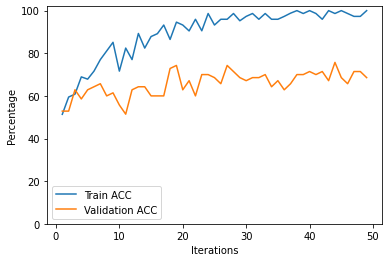

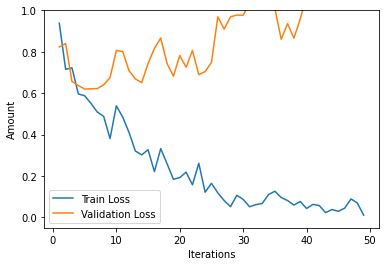

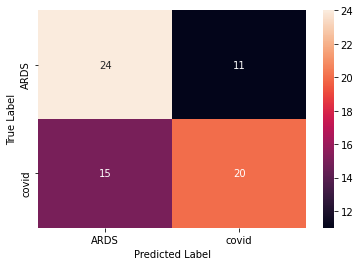

In [41]:
d1_xception_best_model = load_model("d1_xception_best_model.h5")

calculateMetrics(d1_xception_best_model, d1_test_generator, d1_stepsize_test, d1_xception_history, "d1_xception", ['ARDS', 'covid'])

In [42]:
d2_xception_model = get_xception_model()

d2_xception_mc = tf.keras.callbacks.ModelCheckpoint("d2_xception_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d2_xception_history = d2_xception_model.fit(d2_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d2_test_generator, 
                          steps_per_epoch=d2_stepsize_train, 
                          validation_steps=d2_stepsize_test,
                          callbacks=[ccall, es, d2_xception_mc]
                          )

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.7483 - accuracy: 0.7027
Epoch 00001: val_loss improved from inf to 0.15533, saving model to d2_xception_best_model.h5
7/7 [==============================] - 8s 1s/step - loss: 0.7483 - accuracy: 0.7027 - val_loss: 0.1553 - val_accuracy: 0.9857
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.2189 - accuracy: 0.9189
Epoch 00002: val_loss improved from 0.15533 to 0.05922, saving model to d2_xception_best_model.h5
7/7 [==============================] - 6s 809ms/step - loss: 0.2189 - accuracy: 0.9189 - val_loss: 0.0592 - val_accuracy: 0.9714
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.1575 - accuracy: 0.9459
Epoch 00003: val_loss did not improve from 0.05922
7/7 [==============================] - 5s 743ms/step - loss: 0.1575 - accuracy: 0.9459 - val_loss: 0.1465 - val_accuracy: 0.9429
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 0.1264 - accuracy: 0.9459
E

{'NORMAL': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

[[35  0]
 [ 0 35]]

7/7 [==============================] - 2s 245ms/step - loss: 5.0409e-04 - accuracy: 1.0000


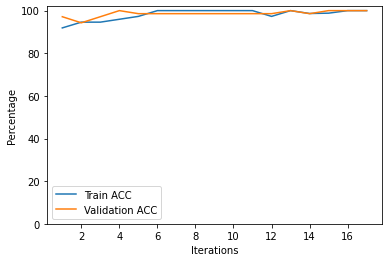

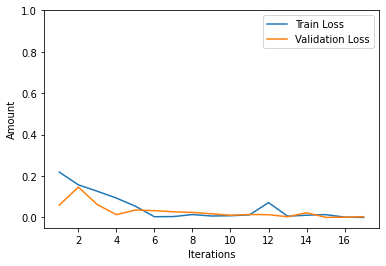

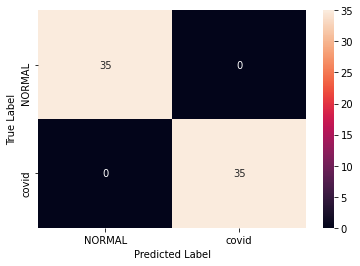

In [43]:
d2_xception_best_model = load_model("d2_xception_best_model.h5")

calculateMetrics(d2_xception_best_model, d2_test_generator, d2_stepsize_test, d2_xception_history, "d2_xception", ['NORMAL', 'covid'])

In [44]:
d3_xception_model = get_xception_model()

d3_xception_mc = tf.keras.callbacks.ModelCheckpoint("d3_xception_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d3_xception_history = d3_xception_model.fit(d3_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d3_test_generator, 
                          steps_per_epoch=d3_stepsize_train, 
                          validation_steps=d3_stepsize_test,
                          callbacks=[ccall, es, d3_xception_mc]
                          )

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.3664 - accuracy: 0.8514
Epoch 00001: val_loss improved from inf to 0.42265, saving model to d3_xception_best_model.h5
7/7 [==============================] - 7s 1s/step - loss: 0.3664 - accuracy: 0.8514 - val_loss: 0.4227 - val_accuracy: 0.8571
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.3052 - accuracy: 0.8649
Epoch 00002: val_loss improved from 0.42265 to 0.27521, saving model to d3_xception_best_model.h5
7/7 [==============================] - 5s 653ms/step - loss: 0.3052 - accuracy: 0.8649 - val_loss: 0.2752 - val_accuracy: 0.9000
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.2025 - accuracy: 0.9189
Epoch 00003: val_loss did not improve from 0.27521
7/7 [==============================] - 5s 644ms/step - loss: 0.2025 - accuracy: 0.9189 - val_loss: 0.3912 - val_accuracy: 0.9143
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 0.2593 - accuracy: 0.9189
E

{'VBP': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.91      0.89      0.90        35

    accuracy                           0.90        70
   macro avg       0.90      0.90      0.90        70
weighted avg       0.90      0.90      0.90        70

[[32  3]
 [ 4 31]]

7/7 [==============================] - 1s 198ms/step - loss: 0.2752 - accuracy: 0.9000


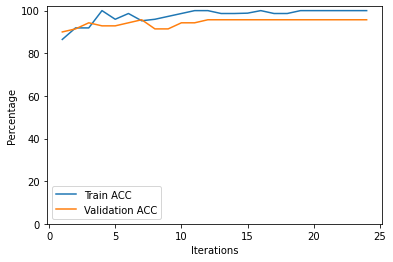

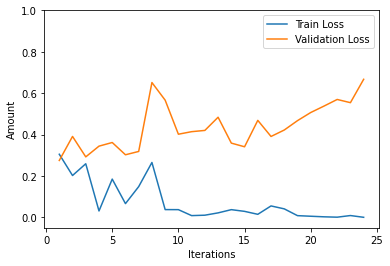

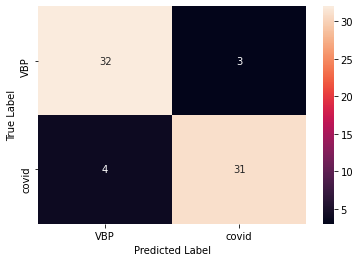

In [45]:
d3_xception_best_model = load_model("d3_xception_best_model.h5")

calculateMetrics(d3_xception_best_model, d3_test_generator, d3_stepsize_test, d3_xception_history, "d3_xception", ['VBP', 'covid'])

# **ResNetV2**

In [0]:
def get_resnetv2_model():
  
  resnetv2_basemodel = tf.keras.applications.ResNet152V2(include_top=False, weights='imagenet', input_shape=(IMSIZE,IMSIZE,3))
  #resnetv2_basemodel.summary()

  x = resnetv2_basemodel.output

  """x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPool2D(2,2) (x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(16, activation='relu')"""

  #x = tf.keras.layers.GlobalAveragePooling2D()(x)
  """x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2,2)(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.3) (x)
  x = tf.keras.layers.Dense(2, activation='softmax') (x)"""

  x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2,2)(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(32, activation="relu")(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

  for layer in resnetv2_basemodel.layers:
    layer.trainable = False

  resnetv2_model = tf.keras.Model(resnetv2_basemodel.input, x)
  resnetv2_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])

  #resnetv2_model.summary()

  return resnetv2_model

In [47]:
d1_resnetv2_model = get_xception_model()

d1_resnetv2_mc = tf.keras.callbacks.ModelCheckpoint("d1_resnetv2_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d1_resnetv2_history = d1_resnetv2_model.fit(d1_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d1_test_generator, 
                          steps_per_epoch=d1_stepsize_train, 
                          validation_steps=d1_stepsize_test,
                          callbacks=[ccall, es, d1_resnetv2_mc]
                          )

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.8018 - accuracy: 0.6216
Epoch 00001: val_loss improved from inf to 0.67575, saving model to d1_resnetv2_best_model.h5
7/7 [==============================] - 9s 1s/step - loss: 0.8018 - accuracy: 0.6216 - val_loss: 0.6757 - val_accuracy: 0.5429
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.6331 - accuracy: 0.6486
Epoch 00002: val_loss improved from 0.67575 to 0.62243, saving model to d1_resnetv2_best_model.h5
7/7 [==============================] - 8s 1s/step - loss: 0.6331 - accuracy: 0.6486 - val_loss: 0.6224 - val_accuracy: 0.6286
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.6263 - accuracy: 0.6081
Epoch 00003: val_loss did not improve from 0.62243
7/7 [==============================] - 6s 924ms/step - loss: 0.6263 - accuracy: 0.6081 - val_loss: 0.6736 - val_accuracy: 0.6571
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 0.6431 - accuracy: 0.6892
Epoc

{'ARDS': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       0.69      0.63      0.66        35
           1       0.66      0.71      0.68        35

    accuracy                           0.67        70
   macro avg       0.67      0.67      0.67        70
weighted avg       0.67      0.67      0.67        70

[[22 13]
 [10 25]]

7/7 [==============================] - 3s 411ms/step - loss: 0.6128 - accuracy: 0.6714


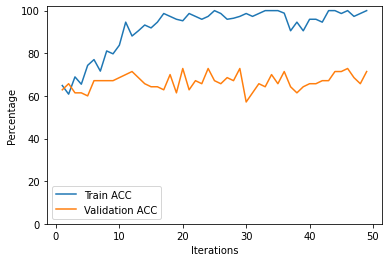

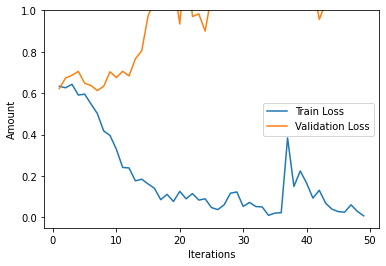

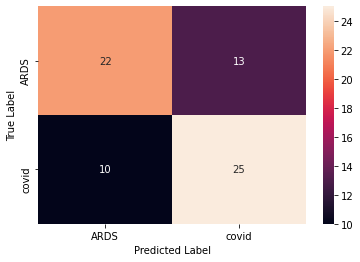

In [48]:
d1_resnetv2_best_model = load_model("d1_resnetv2_best_model.h5")

calculateMetrics(d1_resnetv2_best_model, d1_test_generator, d1_stepsize_test, d1_resnetv2_history, "d1_resnetv2", ['ARDS', 'covid'])

In [49]:
d2_resnetv2_model = get_xception_model()

d2_resnetv2_mc = tf.keras.callbacks.ModelCheckpoint("d2_resnetv2_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d2_resnetv2_history = d1_resnetv2_model.fit(d2_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d2_test_generator, 
                          steps_per_epoch=d2_stepsize_train, 
                          validation_steps=d2_stepsize_test,
                          callbacks=[ccall, es, d2_resnetv2_mc]
                          )

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.1610 - accuracy: 0.9459
Epoch 00001: val_loss improved from inf to 0.49973, saving model to d2_resnetv2_best_model.h5
7/7 [==============================] - 7s 955ms/step - loss: 0.1610 - accuracy: 0.9459 - val_loss: 0.4997 - val_accuracy: 0.8286
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.0350 - accuracy: 0.9865
Epoch 00002: val_loss improved from 0.49973 to 0.13060, saving model to d2_resnetv2_best_model.h5
7/7 [==============================] - 6s 795ms/step - loss: 0.0350 - accuracy: 0.9865 - val_loss: 0.1306 - val_accuracy: 0.9571
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 1.0000
Epoch 00003: val_loss improved from 0.13060 to 0.09041, saving model to d2_resnetv2_best_model.h5
7/7 [==============================] - 6s 802ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0904 - val_accuracy: 0.9714
Epoch 4/100
7/7 [===========================

{'NORMAL': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        35

    accuracy                           0.99        70
   macro avg       0.99      0.99      0.99        70
weighted avg       0.99      0.99      0.99        70

[[34  1]
 [ 0 35]]

7/7 [==============================] - 2s 258ms/step - loss: 0.0815 - accuracy: 0.9857


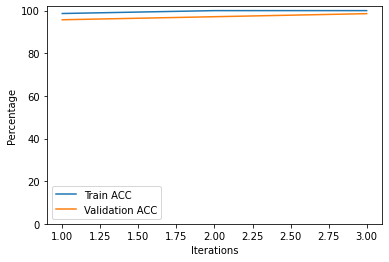

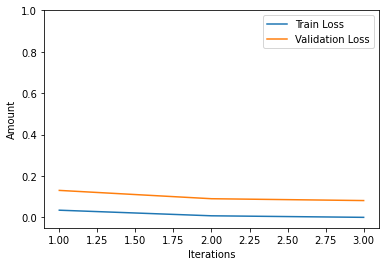

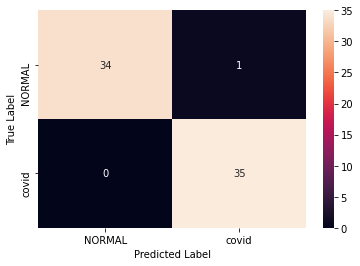

In [50]:
d2_resnetv2_best_model = load_model("d2_resnetv2_best_model.h5")

calculateMetrics(d2_resnetv2_best_model, d2_test_generator, d2_stepsize_test, d2_resnetv2_history, "d2_resnetv2", ['NORMAL', 'covid'])

In [51]:
d3_resnetv2_model = get_xception_model()

d3_resnetv2_mc = tf.keras.callbacks.ModelCheckpoint("d3_resnetv2_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d3_resnetv2_history = d3_resnetv2_model.fit(d3_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d3_test_generator, 
                          steps_per_epoch=d3_stepsize_train, 
                          validation_steps=d3_stepsize_test,
                          callbacks=[ccall, es, d3_resnetv2_mc]
                          )

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.8983 - accuracy: 0.5811
Epoch 00001: val_loss improved from inf to 0.28119, saving model to d3_resnetv2_best_model.h5
7/7 [==============================] - 7s 1s/step - loss: 0.8983 - accuracy: 0.5811 - val_loss: 0.2812 - val_accuracy: 0.8857
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.3718 - accuracy: 0.8514
Epoch 00002: val_loss did not improve from 0.28119
7/7 [==============================] - 4s 568ms/step - loss: 0.3718 - accuracy: 0.8514 - val_loss: 0.3234 - val_accuracy: 0.9143
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.1937 - accuracy: 0.9324
Epoch 00003: val_loss did not improve from 0.28119
7/7 [==============================] - 4s 621ms/step - loss: 0.1937 - accuracy: 0.9324 - val_loss: 0.5032 - val_accuracy: 0.8714
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 0.2114 - accuracy: 0.9189
Epoch 00004: val_loss did not improve from 0.281

{'VBP': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        35
           1       0.92      0.97      0.94        35

    accuracy                           0.94        70
   macro avg       0.94      0.94      0.94        70
weighted avg       0.94      0.94      0.94        70

[[32  3]
 [ 1 34]]

7/7 [==============================] - 1s 191ms/step - loss: 0.1848 - accuracy: 0.9429


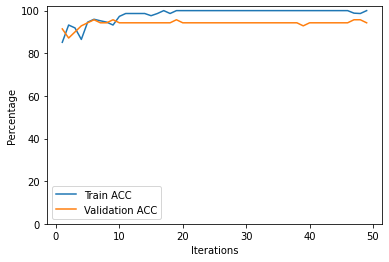

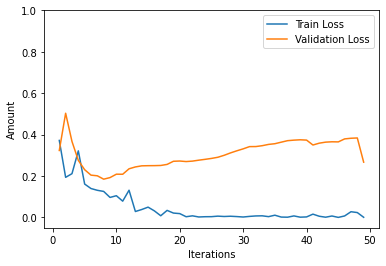

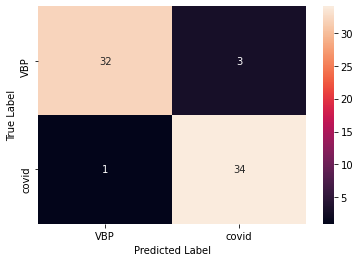

In [52]:
d3_resnetv2_best_model = load_model("d3_resnetv2_best_model.h5")

calculateMetrics(d3_resnetv2_best_model, d3_test_generator, d3_stepsize_test, d3_resnetv2_history, "d3_resnetv2", ['VBP', 'covid'])

# **MobileNetV2**

In [0]:
def get_mobilenetv2_model():
  mobilenetv2_basemodel = tf.keras.applications.MobileNetV2(include_top=False, weights="imagenet", input_shape=(IMSIZE,IMSIZE,3))
  #mobilenetv2_basemodel.summary()

  x = mobilenetv2_basemodel.output

  """x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPool2D(2,2) (x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(16, activation='relu')"""

  #x = tf.keras.layers.GlobalAveragePooling2D()(x)
  """x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2,2)(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.3) (x)
  x = tf.keras.layers.Dense(2, activation='softmax') (x)"""

  x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2,2)(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(32, activation="relu")(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

  for layer in mobilenetv2_basemodel.layers:
    layer.trainable = False

  mobilenetv2_model = tf.keras.Model(mobilenetv2_basemodel.input, x)
  mobilenetv2_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

  #mobilenetv2_model.summary()

  return mobilenetv2_model

In [54]:
d1_mobilenetv2_model = get_mobilenetv2_model()

d1_mobilenetv2_mc = tf.keras.callbacks.ModelCheckpoint("d1_mobilenetv2_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d1_mobilenetv2_history = d1_mobilenetv2_model.fit(d1_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d1_test_generator, 
                          steps_per_epoch=d1_stepsize_train, 
                          validation_steps=d1_stepsize_test,
                          callbacks=[ccall, es, d1_mobilenetv2_mc]
                          )

9412608/9406464 [==============================] - 0s 0us/step
Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 1.4480 - accuracy: 0.4730
Epoch 00001: val_loss improved from inf to 0.76404, saving model to d1_mobilenetv2_best_model.h5
7/7 [==============================] - 9s 1s/step - loss: 1.4480 - accuracy: 0.4730 - val_loss: 0.7640 - val_accuracy: 0.5143
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 1.1937 - accuracy: 0.5676
Epoch 00002: val_loss did not improve from 0.76404
7/7 [==============================] - 7s 957ms/step - loss: 1.1937 - accuracy: 0.5676 - val_loss: 0.9978 - val_accuracy: 0.5143
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.9700 - accuracy: 0.5946
Epoch 00003: val_loss improved from 0.76404 to 0.58254, saving model to d1_mobilenetv2_best_model.h5
7/7 [==============================] - 7s 1s/step - loss: 0.9700 - accuracy: 0.5946 - val_loss: 0.5825 - val_accuracy: 0.6571
Epoch 4/100
7/7 [===========

{'ARDS': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       0.73      0.54      0.62        35
           1       0.64      0.80      0.71        35

    accuracy                           0.67        70
   macro avg       0.68      0.67      0.67        70
weighted avg       0.68      0.67      0.67        70

[[19 16]
 [ 7 28]]

7/7 [==============================] - 3s 391ms/step - loss: 0.5712 - accuracy: 0.6714


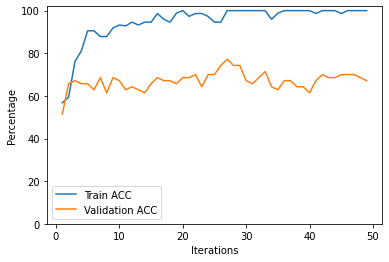

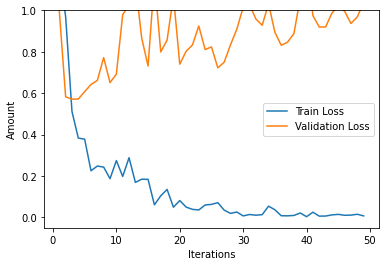

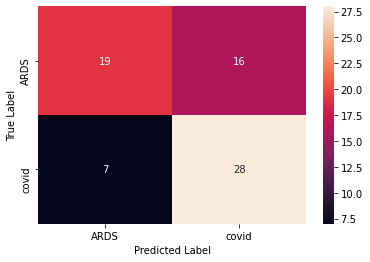

In [55]:
d1_mobilenetv2_best_model = load_model("d1_mobilenetv2_best_model.h5")

calculateMetrics(d1_mobilenetv2_best_model, d1_test_generator, d1_stepsize_test, d1_mobilenetv2_history, "d1_mobilenetv2", ['ARDS', 'covid'])

In [56]:
d2_mobilenetv2_model = get_mobilenetv2_model()

d2_mobilenetv2_mc = tf.keras.callbacks.ModelCheckpoint("d2_mobilenetv2_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d2_mobilenetv2_history = d2_mobilenetv2_model.fit(d2_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d2_test_generator, 
                          steps_per_epoch=d2_stepsize_train, 
                          validation_steps=d2_stepsize_test,
                          callbacks=[ccall, es, d2_mobilenetv2_mc]
                          )

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.3038 - accuracy: 0.8514
Epoch 00001: val_loss improved from inf to 0.11121, saving model to d2_mobilenetv2_best_model.h5
7/7 [==============================] - 7s 945ms/step - loss: 0.3038 - accuracy: 0.8514 - val_loss: 0.1112 - val_accuracy: 0.9571
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.0332 - accuracy: 0.9865
Epoch 00002: val_loss improved from 0.11121 to 0.04525, saving model to d2_mobilenetv2_best_model.h5
7/7 [==============================] - 6s 796ms/step - loss: 0.0332 - accuracy: 0.9865 - val_loss: 0.0452 - val_accuracy: 0.9714
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.0179 - accuracy: 1.0000
Epoch 00003: val_loss improved from 0.04525 to 0.02355, saving model to d2_mobilenetv2_best_model.h5
7/7 [==============================] - 5s 777ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.0235 - val_accuracy: 0.9857
Epoch 4/100
7/7 [==================

{'NORMAL': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

[[35  0]
 [ 0 35]]

7/7 [==============================] - 2s 236ms/step - loss: 0.0033 - accuracy: 1.0000


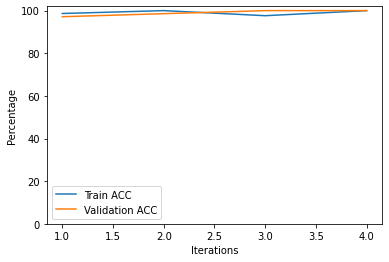

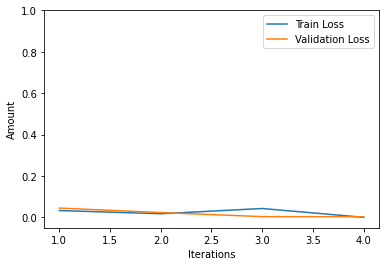

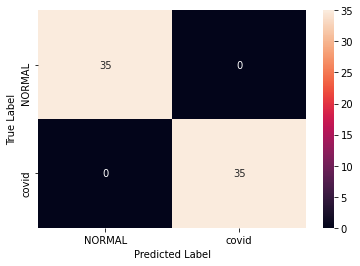

In [57]:
d2_mobilenetv2_best_model = load_model("d2_mobilenetv2_best_model.h5")

calculateMetrics(d2_mobilenetv2_best_model, d2_test_generator, d2_stepsize_test, d2_mobilenetv2_history, "d2_mobilenetv2", ['NORMAL', 'covid'])

In [58]:
d3_mobilenetv2_model = get_mobilenetv2_model()

d3_mobilenetv2_mc = tf.keras.callbacks.ModelCheckpoint("d3_mobilenetv2_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d3_mobilenetv2_history = d3_mobilenetv2_model.fit(d3_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d3_test_generator, 
                          steps_per_epoch=d3_stepsize_train, 
                          validation_steps=d3_stepsize_test,
                          callbacks=[ccall, es, d3_mobilenetv2_mc]
                          )

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.9329 - accuracy: 0.6216
Epoch 00001: val_loss improved from inf to 0.45095, saving model to d3_mobilenetv2_best_model.h5
7/7 [==============================] - 6s 798ms/step - loss: 0.9329 - accuracy: 0.6216 - val_loss: 0.4510 - val_accuracy: 0.8857
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.6476 - accuracy: 0.6622
Epoch 00002: val_loss improved from 0.45095 to 0.25201, saving model to d3_mobilenetv2_best_model.h5
7/7 [==============================] - 4s 640ms/step - loss: 0.6476 - accuracy: 0.6622 - val_loss: 0.2520 - val_accuracy: 0.9571
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.4160 - accuracy: 0.8378
Epoch 00003: val_loss improved from 0.25201 to 0.13475, saving model to d3_mobilenetv2_best_model.h5
7/7 [==============================] - 4s 624ms/step - loss: 0.4160 - accuracy: 0.8378 - val_loss: 0.1347 - val_accuracy: 1.0000
Epoch 4/100
7/7 [==================

{'VBP': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

[[35  0]
 [ 0 35]]

7/7 [==============================] - 1s 193ms/step - loss: 0.0049 - accuracy: 1.0000


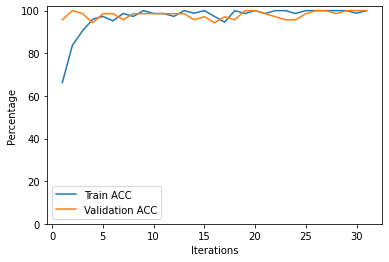

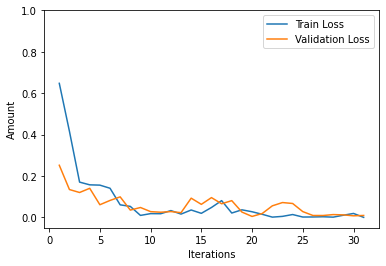

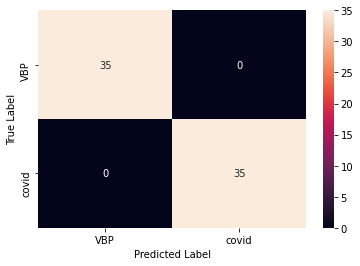

In [59]:
d3_mobilenetv2_best_model = load_model("d3_mobilenetv2_best_model.h5")

calculateMetrics(d3_mobilenetv2_best_model, d3_test_generator, d3_stepsize_test, d3_mobilenetv2_history, "d3_mobilenetv2", ['VBP', 'covid'])

# **DenseNET201**

In [0]:
def get_densenet_model():
  densenet_basemodel = tf.keras.applications.DenseNet201(include_top=False, input_shape=(IMSIZE,IMSIZE,3), weights='imagenet')
  #densenet_basemodel.summary()

  x = densenet_basemodel.output

  """x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPool2D(2,2) (x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(16, activation='relu')"""

  #x = tf.keras.layers.GlobalAveragePooling2D()(x)
  """x = tf.keras.layers.Conv2D(32, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2,2)(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.3) (x)
  x = tf.keras.layers.Dense(2, activation='softmax') (x)"""

  x = tf.keras.layers.Conv2D(16, (3,3), activation='relu')(x)
  x = tf.keras.layers.MaxPooling2D(2,2)(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dense(32, activation="relu")(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

  for layer in densenet_basemodel.layers:
    layer.trainable = False

  densenet_model = tf.keras.Model(densenet_basemodel.input, x)
  densenet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])

  #densenet_model.summary()

  return densenet_model

In [61]:
d1_densenet_model = get_densenet_model()

d1_densenet_mc = tf.keras.callbacks.ModelCheckpoint("d1_densenet_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d1_densenet_history = d1_densenet_model.fit(d1_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d1_test_generator, 
                          steps_per_epoch=d1_stepsize_train, 
                          validation_steps=d1_stepsize_test,
                          callbacks=[ccall, es, d1_densenet_mc]
                          )

74842112/74836368 [==============================] - 1s 0us/step
Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 1.2118 - accuracy: 0.5541
Epoch 00001: val_loss improved from inf to 0.65591, saving model to d1_densenet_best_model.h5
7/7 [==============================] - 16s 2s/step - loss: 1.2118 - accuracy: 0.5541 - val_loss: 0.6559 - val_accuracy: 0.5714
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.7622 - accuracy: 0.6216
Epoch 00002: val_loss did not improve from 0.65591
7/7 [==============================] - 7s 1s/step - loss: 0.7622 - accuracy: 0.6216 - val_loss: 0.7150 - val_accuracy: 0.6000
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.6346 - accuracy: 0.6667
Epoch 00003: val_loss improved from 0.65591 to 0.65070, saving model to d1_densenet_best_model.h5
7/7 [==============================] - 10s 1s/step - loss: 0.6346 - accuracy: 0.6667 - val_loss: 0.6507 - val_accuracy: 0.5714
Epoch 4/100
7/7 [================

{'ARDS': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       0.73      0.69      0.71        35
           1       0.70      0.74      0.72        35

    accuracy                           0.71        70
   macro avg       0.71      0.71      0.71        70
weighted avg       0.71      0.71      0.71        70

[[24 11]
 [ 9 26]]

7/7 [==============================] - 3s 387ms/step - loss: 0.6175 - accuracy: 0.7143


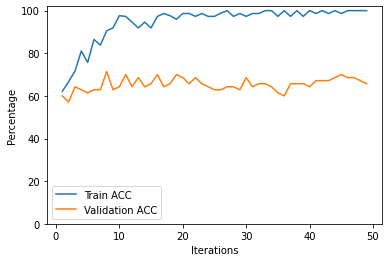

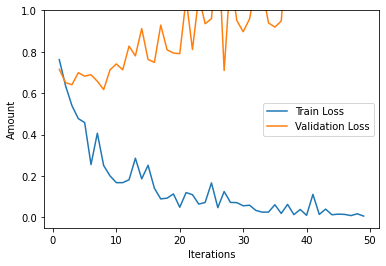

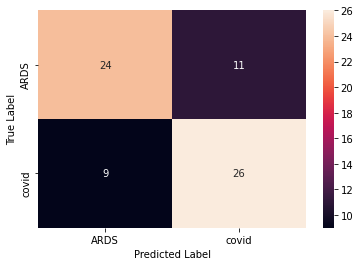

In [62]:
d1_densenet_best_model = load_model("d1_densenet_best_model.h5")

calculateMetrics(d1_densenet_best_model, d1_test_generator, d1_stepsize_test, d1_densenet_history, "d1_densenet", ['ARDS', 'covid'])

In [63]:
d2_densenet_model = get_densenet_model()

d2_densenet_mc = tf.keras.callbacks.ModelCheckpoint("d2_densenet_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d2_densenet_history = d2_densenet_model.fit(d2_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d2_test_generator, 
                          steps_per_epoch=d2_stepsize_train, 
                          validation_steps=d2_stepsize_test,
                          callbacks=[ccall, es, d2_densenet_mc]
                          )

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 0.7802 - accuracy: 0.6622
Epoch 00001: val_loss improved from inf to 0.06690, saving model to d2_densenet_best_model.h5
7/7 [==============================] - 13s 2s/step - loss: 0.7802 - accuracy: 0.6622 - val_loss: 0.0669 - val_accuracy: 0.9714
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.1168 - accuracy: 0.9730
Epoch 00002: val_loss did not improve from 0.06690
7/7 [==============================] - 5s 736ms/step - loss: 0.1168 - accuracy: 0.9730 - val_loss: 0.1573 - val_accuracy: 0.9286
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.0407 - accuracy: 0.9865
Epoch 00003: val_loss improved from 0.06690 to 0.02616, saving model to d2_densenet_best_model.h5
7/7 [==============================] - 8s 1s/step - loss: 0.0407 - accuracy: 0.9865 - val_loss: 0.0262 - val_accuracy: 0.9857
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss: 0.0488 - accuracy: 0.9730
Epo

{'NORMAL': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

[[35  0]
 [ 0 35]]

7/7 [==============================] - 2s 247ms/step - loss: 0.0020 - accuracy: 1.0000


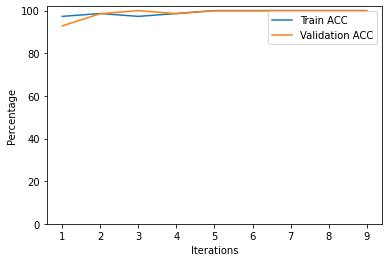

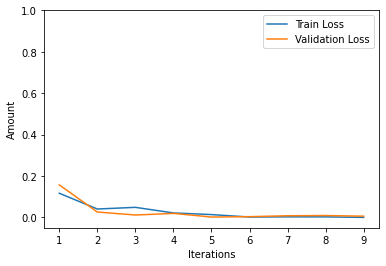

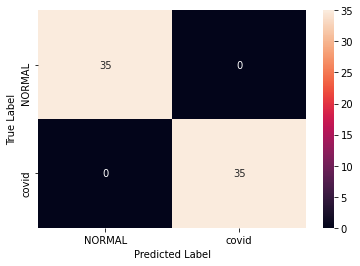

In [64]:
d2_densenet_best_model = load_model("d2_densenet_best_model.h5")

calculateMetrics(d2_densenet_best_model, d2_test_generator, d2_stepsize_test, d2_densenet_history, "d2_densenet", ['NORMAL', 'covid'])

In [65]:
d3_densenet_model = get_densenet_model()

d3_densenet_mc = tf.keras.callbacks.ModelCheckpoint("d3_densenet_best_model.h5", monitor='val_loss', verbose=1, save_best_only=True)

d3_densenet_history = d3_densenet_model.fit(d3_train_generator, 
                          epochs=EPOCHS, 
                          validation_data=d3_test_generator, 
                          steps_per_epoch=d3_stepsize_train, 
                          validation_steps=d3_stepsize_test,
                          callbacks=[ccall, es, d3_densenet_mc]
                          )

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 1.4583 - accuracy: 0.5946
Epoch 00001: val_loss improved from inf to 0.65273, saving model to d3_densenet_best_model.h5
7/7 [==============================] - 11s 2s/step - loss: 1.4583 - accuracy: 0.5946 - val_loss: 0.6527 - val_accuracy: 0.6714
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.5471 - accuracy: 0.7568
Epoch 00002: val_loss improved from 0.65273 to 0.40235, saving model to d3_densenet_best_model.h5
7/7 [==============================] - 6s 905ms/step - loss: 0.5471 - accuracy: 0.7568 - val_loss: 0.4024 - val_accuracy: 0.8714
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.3226 - accuracy: 0.8649
Epoch 00003: val_loss improved from 0.40235 to 0.19598, saving model to d3_densenet_best_model.h5
7/7 [==============================] - 6s 825ms/step - loss: 0.3226 - accuracy: 0.8649 - val_loss: 0.1960 - val_accuracy: 0.9286
Epoch 4/100
7/7 [=============================

{'VBP': 0, 'covid': 1}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        35

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

[[35  0]
 [ 0 35]]

7/7 [==============================] - 1s 197ms/step - loss: 0.0075 - accuracy: 1.0000


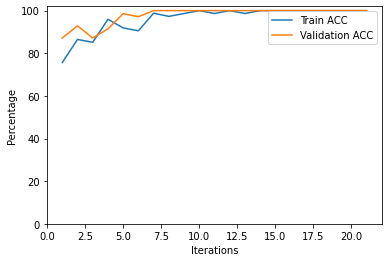

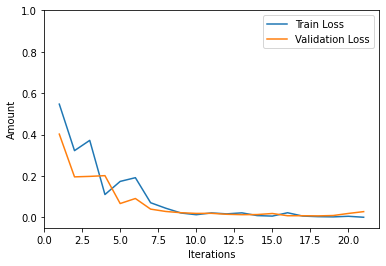

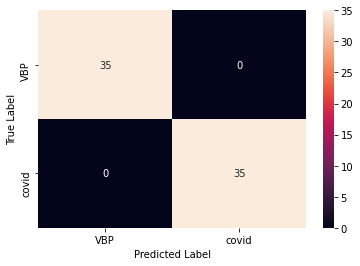

In [66]:
d3_densenet_best_model = load_model("d3_densenet_best_model.h5")

calculateMetrics(d3_densenet_best_model, d3_test_generator, d3_stepsize_test, d3_densenet_history, "d3_densenet", ['VBP', 'covid'])

# Do it Yourself

In [67]:
"""custom_model = tf.keras.Sequential([
                                    tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(2, activation='softmax')

])

custom_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

custom_model.summary()"""

"custom_model = tf.keras.Sequential([\n                                    tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)),\n                                    tf.keras.layers.MaxPool2D(2,2),\n                                    tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu', input_shape=(256,256,3)),\n                                    tf.keras.layers.MaxPool2D(2,2),\n                                    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),\n                                    tf.keras.layers.MaxPool2D(2,2),\n                                    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),\n                                    tf.keras.layers.MaxPool2D(2,2),\n                                    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),\n                                    tf.keras.layers.MaxPool2D(2,2),\n                                    tf.keras.layers

In [68]:
"""custom_history = custom_model.fit(d2_train_generator, 
                 epochs=40, 
                 steps_per_epoch=d2_stepsize_train, 
                 validation_datagen=d2_test_generator,
                 validation_steps=d2_stepsize_test
                 )"""

'custom_history = custom_model.fit(d2_train_generator, \n                 epochs=40, \n                 steps_per_epoch=d2_stepsize_train, \n                 validation_datagen=d2_test_generator,\n                 validation_steps=d2_stepsize_test\n                 )'

In [69]:
"""custom_model.evaluate(d2_test_generator)"""

'custom_model.evaluate(d2_test_generator)'